# Unit 5 - Financial Planning

In [19]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [20]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [21]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3


In [22]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [23]:
btc_price = requests.get(btc_url).json()
btc_price

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19125225,
   'total_supply': 19125225,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 22938.0,
     'volume_24h': 21234781187,
     'market_cap': 438959229833,
     'percentage_change_1h': -1.27612179037981,
     'percentage_change_24h': -1.82331100653977,
     'percentage_change_7d': -4.21928553746641,
     'percent_change_1h': -1.27612179037981,
     'percent_change_24h': -1.82331100653977,
     'percent_change_7d': -4.21928553746641}},
   'last_updated': 1660869860}},
 'metadata': {'timestamp': 1660869860,
  'num_cryptocurrencies': 3116,
  'error': None}}

In [24]:
btc_price = requests.get(btc_url).json()
btc_price = int(btc_price["data"]["1"] ["quotes"] ["USD"] ["price"])
#btc_price.dtypes()

In [25]:
#eth_price = requests.get(eth_url).json()
#eth_price = eth_price["data"]["1"] ["quotes"] ["USD"] ["price"]
#eth_price

In [26]:
# Fetch current BTC price
#btc_price = requests.get(btc_url).json()
#btc_price = btc_price["data"]["1"] ["1"] ["quotes"] ["USD"] ["price"]
# Fetch current ETH price

eth_price = requests.get(eth_url).json()
eth_price = int(eth_price["data"]["1027"] ["quotes"] ["USD"] ["price"])
# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27525.60
The current value of your 5.3 ETH is $9656.60


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [27]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [28]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [29]:
# Format current date as ISO format
today = pd.Timestamp("2022-08-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
# YOUR CODE HERE!

df_portfolio

AGG                                              \
                             open    high     low  close   volume trade_count   
timestamp                                                                       
2022-08-16 04:00:00+00:00  103.13  103.13  102.79  103.1  4976060       20307   

                                          SPY                         \
                                 vwap    open    high     low  close   
timestamp                                                              
2022-08-16 04:00:00+00:00  103.015126  427.62  431.73  426.88  429.7   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2022-08-16 04:00:00+00:00  59118566      410281  429.307919

In [30]:
# Pick AGG and SPY close prices
agg_price = float(df_portfolio["AGG"]["close"])
spy_price = float(df_portfolio["SPY"]["close"]) 

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $103.1
Current SPY closing price: $429.7


In [31]:
# Compute the current value of shares
agg_value = agg_price * my_agg
spy_value = spy_price * my_spy


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $21485.00
The current value of your 200 AGG shares is $20620.00


### Savings Health Analysis

In [32]:
# Set monthly household income
monthly_income = 12000

stock_shares = agg_value + spy_value
coin_shares = my_btc_value + my_eth_value

# Consolidate financial assets data
df_assets =  {
    "amount": [stock_shares, coin_shares],
  
}
assets = ["shares", "crypto"]
# Create savings DataFrame
df_savings = pd.DataFrame(df_assets, index= assets)

# Display savings DataFrame
display(df_savings)

,amount
shares,42105.0
crypto,37182.2


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

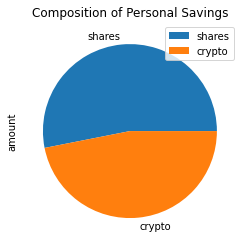

In [33]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title='Composition of Personal Savings', ylabel='amount')


In [34]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
df_savings.sum()

# Validate saving health
if df_savings > emergency_fund:
    print("Congrats, you have enough money in savings!")
elif df_savings == emergency_fund:
    print("Congrats, you've met your financial goal")
elif df_savings < emergency_fund:
    print("You need to continue saving before investing")

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [35]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [36]:
# Get 5 years' worth of historical data for SPY and AGG
ticker = ["AGG", "SPY"]
timeframe = "1Day"
start_date = pd.Timestamp("2018-08-16", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-08-16", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
AGG = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
ticker_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
ticker_data.head()

AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2018-08-16 04:00:00+00:00  106.38  106.420  106.24  106.40  2658401   
2018-08-17 04:00:00+00:00  106.43  106.545  106.38  106.46  2071251   
2018-08-20 04:00:00+00:00  106.59  106.680  106.53  106.67  2355530   
2018-08-21 04:00:00+00:00  106.58  106.620  106.51  106.58  2835014   
2018-08-22 04:00:00+00:00  106.66  106.710  106.57  106.67  2190302   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2018-08-16 04:00:00+00:00       11144  106.338965  283.38  285.0400  283.3600   
2018-08-17 04:00:00+00:00       10343  106.474263  283.76  285.5601  283.3700   
2018-08-20 04:00:00+00:00       11110  106.642033  285.58  285.9700  285.0600   
2018-08-21 04:00:00+00:00       10423  106.570054  286.26  287.3100  285.7135   
2018-08-22 04:00:00+00:00        9133  106.643347  285.89  286.7600  285.5750   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-08-16 04:00:00+00:00  284.06  69968919      259400  284.017323  
2018-08-17 04:00:00+00:00  285.06  66354435      244275  284.606982  
2018-08-20 04:00:00+00:00  285.67  39817739      160489  285.568037  
2018-08-21 04:00:00+00:00  286.34  67271983      243816  286.583994  
2018-08-22 04:00:00+00:00  286.17  44993333      190750  286.230403

In [37]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_STOCK = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    weights = [.6,.4],
    num_trading_days = 252*30
)

In [38]:
# Printing the simulation input data
MC_STOCK = MCSimulation(portfolio_data = ticker_data, weights = [.6, .4], num_simulation=num_sims, num_trading_days=252*30)

In [39]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_STOCK.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 110.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 120.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 130.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 140.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 150.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 160.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 170.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 180.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 190.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 200.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 210.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 220.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 230.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 240.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 250.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 260.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 270.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 280.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 290.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 300.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 310.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 320.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 330.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 340.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 350.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 360.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 370.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 380.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 390.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 400.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 410.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 420.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 430.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 440.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 450.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 460.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 470.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 480.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

Running Monte Carlo simulation number 490.


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly frag

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011497,1.013164,1.004429,0.999101,1.007936,1.003577,1.004582,1.005392,0.995184,0.999582,...,1.003298,1.006677,1.006619,1.003772,0.996524,0.998549,1.002027,1.006932,1.004618,0.992876
2,1.004516,1.012910,1.008857,0.990864,1.000707,1.011039,1.006682,1.000603,0.993453,0.999971,...,0.995720,1.004001,1.006270,1.015260,0.994854,1.015432,1.004336,1.012166,1.013313,0.998264
3,1.006001,1.016174,1.010592,0.982075,1.009879,0.997766,0.995138,1.005623,0.984543,0.999875,...,0.991888,0.999765,1.008469,1.016038,0.993785,1.020356,1.007641,1.025469,1.017434,1.000009
4,1.004598,1.007838,1.016539,0.991327,1.021801,1.000787,0.998318,1.004050,0.983558,1.000709,...,0.993508,0.999829,1.000719,1.012998,0.991365,1.018619,1.014805,1.023615,1.020194,1.009936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.255301,8.360866,5.048359,3.581153,7.975463,11.111895,2.519623,5.201874,8.854587,1.292638,...,7.520538,1.651535,1.917786,11.349309,6.054170,6.131714,3.717740,2.909320,5.619351,2.576426
7557,1.238010,8.357561,5.080332,3.603075,8.036207,10.996165,2.538927,5.185137,8.787395,1.309630,...,7.510258,1.657865,1.914531,11.396640,5.979764,6.141306,3.706411,2.910747,5.662660,2.553445
7558,1.235892,8.326132,5.114598,3.589372,8.096888,11.067707,2.534723,5.216984,8.815443,1.320690,...,7.517256,1.671437,1.928907,11.351824,5.941178,6.105604,3.677791,2.874909,5.664091,2.561509
7559,1.238548,8.348561,5.109357,3.579459,8.029586,11.099871,2.536219,5.192882,8.899596,1.323053,...,7.543730,1.662318,1.928243,11.290124,5.935183,6.083976,3.672239,2.858547,5.714107,2.592036


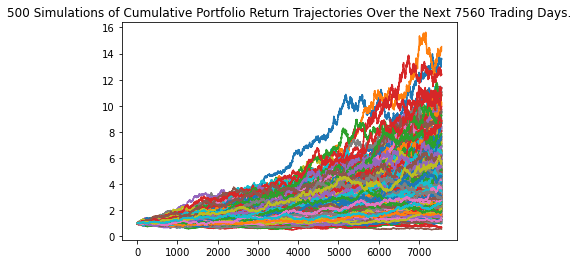

In [43]:
# Plot simulation outcomes
line_plot = MC_STOCK.plot_simulation()

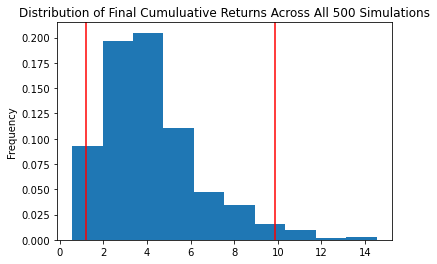

In [44]:
# Plot probability distribution and confidence intervals
plot_dist = MC_STOCK.plot_distribution()

### Retirement Analysis

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_table1 = MC_STOCK.summarize_cumulative_return()
# Print summary statistics
simulated_returns_data = {
    "mean": list(MC_STOCK.simulated_return.mean(axis=1)),
    "median": list(MC_STOCK.simulated_return.median(axis=1)),
    "min": list(MC_STOCK.simulated_return.min(axis=1)),
    "max": list(MC_STOCK.simulated_return.max(axis=1))
}
simulated_returns_df = pd.DataFrame(simulated_returns_data)

print(sum_table1)

count           500.000000
mean              4.198199
std               2.235517
min               0.564465
25%               2.633742
50%               3.757799
75%               5.166429
max              14.527556
95% CI Lower      1.182363
95% CI Upper      9.863717
Name: 7560, dtype: float64


/Users/jeffoneal/Desktop/asu_fintech_copy/Module_5/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [48]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_table1[8]*initial_investment,2)
ci_upper = round(sum_table1[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $23647.25 and $197274.34


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [49]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_table1[8]*initial_investment,2)
ci_upper = round(sum_table1[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $35470.88 and $295911.51


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")